In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

In [2]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.runnables import Runnable
from langchain_core.messages import HumanMessage, BaseMessage
from collections.abc import Sequence

In [3]:
class State(TypedDict):
    messages: Sequence[BaseMessage]

In [4]:
state = State(messages=[HumanMessage('Could you tell me a grook by Piet Hein?')])

In [5]:
state['messages'][0].pretty_print()

================================ Human Message =================================

Could you tell me a grook by Piet Hein?


## Define the Nodes

In [6]:
chat = ChatOpenAI(model="gpt-4o-mini", seed=365, temperature=0, max_tokens=100)

In [7]:
response = chat.invoke(state['messages'])

In [8]:
response.pretty_print()

================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here’s one of his famous grooks:

**"The road to wisdom? Well, it’s plain  
And simple to express:  
Err and err and err again  
But less and less and less."**

This grook captures the essence of learning through experience and the importance of refining one's understanding over time. If you'd like to hear more or discuss his work further, feel free to


In [9]:
def chatbot(state: State) -> State:
    response = chat.invoke(state['messages'])
    response.pretty_print()
    return State(messages=[response])
    

In [10]:
chatbot(state)

================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here’s one of his famous grooks:

**"The road to wisdom? Well, it’s plain  
And simple to express:  
Err and err and err again  
But less and less and less."**

This grook reflects on the process of learning and the importance of making mistakes along the way. If you'd like to hear more or discuss his work further, feel free to ask


{'messages': [AIMessage(content='Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here’s one of his famous grooks:\n\n**"The road to wisdom? Well, it’s plain  \nAnd simple to express:  \nErr and err and err again  \nBut less and less and less."**\n\nThis grook reflects on the process of learning and the importance of making mistakes along the way. If you\'d like to hear more or discuss his work further, feel free to ask', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 18, 'total_tokens': 118, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BmyTuuV3XA7kfjS2iOp7Y8shsS8Yr', 'service_tier': 'default', 'finish_reason': 'le

## Define the graph

In [12]:
graph = StateGraph(State)

In [13]:
graph.add_node("chatbot", chatbot)

In [14]:
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

In [15]:
graph_compiled = graph.compile()

In [16]:
isinstance(graph_compiled, Runnable)

True

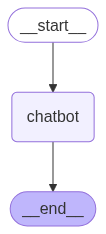

In [18]:
graph_compiled

##  Test the graph

In [19]:
graph_compiled.invoke(state)

================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here’s one of his famous grooks:

**"The road to wisdom? Well, it’s plain  
And simple to express:  
Err and err and err again  
But less and less and less."**

This grook reflects on the process of learning and the importance of making mistakes along the way. If you'd like to hear more or discuss his work further, feel free to ask


{'messages': [AIMessage(content='Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here’s one of his famous grooks:\n\n**"The road to wisdom? Well, it’s plain  \nAnd simple to express:  \nErr and err and err again  \nBut less and less and less."**\n\nThis grook reflects on the process of learning and the importance of making mistakes along the way. If you\'d like to hear more or discuss his work further, feel free to ask', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 18, 'total_tokens': 118, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BmyVgtY7kKwHinCDe2NnigvBMYhSI', 'service_tier': 'default', 'finish_reason': 'le


KeyboardInterrupt

